<span style="color:green;font-weight:bold">Name : Rashmi Bhaskar 

<span style="color:green;font-weight:bold">Github Username : rashmibhaskar

<span style="color:green;font-weight:bold">USC ID : 4408460333

In [362]:
import warnings
import os
warnings.filterwarnings('ignore')
os.environ['PYTHONWARNINGS'] = 'ignore'

import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from scipy.special import softmax
from collections import defaultdict
from IPython.display import display
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, StratifiedKFold
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.cluster import KMeans,SpectralClustering
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline

#### 1. Supervised, Semi-Supervised, and Unsupervised Learning
#### (a)Download the Breast Cancer Wisconsin (Diagnostic) Data Set from:https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29. Download the data in https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data, which has IDs, classes (Benign=B, Malignant=M), and 30 attributes. This data has two output classes.

In [363]:
df = pd.read_csv("../data/wdbc.data",header=None)
df=df.rename(columns={0:"id",1:"diagnosis"})
df = df.iloc[:,1:]
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})

df_B = df[df['diagnosis']==0]
y_B = df_B.iloc[:,:1]
X_B = df_B.iloc[:,1:]

df_M = df[df['diagnosis']==1]
y_M = df_M.iloc[:,:1]
X_M = df_M.iloc[:,1:]

display(df_B)
display(df_M)

,diagnosis,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
19,0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,0,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,0,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,0,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
46,0,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,0,14.590,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.037360,0.1454,...,15.480,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004
559,0,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.041050,0.1388,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732
560,0,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.043040,0.1537,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321
561,0,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.000000,0.1060,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905


,diagnosis,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,1,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,...,24.29,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.45,26.40,166.10,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.69,38.25,155.00,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.98,34.12,126.70,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820


#### 1(b) i. Supervised Learning:Train an L1-penalized SVM to classify the data. Use 5 fold cross validation to choose the penalty parameter. Use normalized data. Report the average accuracy, precision, recall,F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [365]:
c_range = np.logspace(-3,6,20)
def plot_roc(roc_, val):
    fpr, tpr, _ = roc_
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='green',lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='purple', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for iteration number '+ str(val))
    plt.legend(loc="lower right")
    plt.show()
    return roc_auc

def plot_confusion_matrix(cm, val):
    plt.figure()
    ax= plt.subplot()
    sbn.heatmap(cm, annot=True, fmt='g', ax=ax)
    ax.set_title('Confusion Matrix for iteration number '+str(val))
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels')
    ax.xaxis.set_ticklabels(['B', 'M'])
    ax.yaxis.set_ticklabels(['M', 'B'])

In [163]:
train_dict = defaultdict(list)
test_dict = defaultdict(list)

for m in range(30):
    X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(X_B, y_B,test_size=0.20, shuffle=True)
    X_train_M, X_test_M, y_train_M, y_test_M = train_test_split(X_M, y_M,test_size=0.20, shuffle=True)

    X_train = pd.concat([X_train_M,X_train_B])
    y_train = pd.concat([y_train_M,y_train_B])
    X_test = pd.concat([X_test_M,X_test_B])
    y_test = pd.concat([y_test_M,y_test_B])

    pipeline = imbpipeline(steps = [['minmaxscaler',preprocessing.MinMaxScaler()],['linearsvc', LinearSVC(penalty='l1', dual=False, max_iter=1e+6)]])
    param_grid = {'linearsvc__C':c_range}
    SVC_l1_cv = GridSearchCV(estimator=pipeline,param_grid = param_grid, cv=KFold(5), n_jobs=-1)

    l1_model = SVC_l1_cv.fit(X_train, y_train['diagnosis'])

    y_pred_train_l1 = l1_model.predict(X_train)
    y_prob_train_l1 = l1_model.decision_function(X_train)
    train_dict['Accuracy'].append(accuracy_score(y_train['diagnosis'], y_pred_train_l1))
    train_dict['Precision'].append(precision_score(y_train['diagnosis'], y_pred_train_l1))
    train_dict['Recall'].append(recall_score(y_train['diagnosis'], y_pred_train_l1))
    train_dict['F1_Score'].append(f1_score(y_train['diagnosis'], y_pred_train_l1))
    train_dict['AUC'].append(roc_auc_score(y_train['diagnosis'], y_prob_train_l1))
    train_dict['ROC'].append(roc_curve(y_train['diagnosis'], y_prob_train_l1))
    train_dict['CM'].append(confusion_matrix(y_train['diagnosis'], y_pred_train_l1))


    y_pred_test_l1 = l1_model.predict(X_test)
    y_prob_test_l1 = l1_model.decision_function(X_test)
    test_dict['Accuracy'].append(accuracy_score(y_test['diagnosis'], y_pred_test_l1))
    test_dict['Precision'].append(precision_score(y_test['diagnosis'], y_pred_test_l1))
    test_dict['Recall'].append(recall_score(y_test['diagnosis'], y_pred_test_l1))
    test_dict['F1_Score'].append(f1_score(y_test['diagnosis'], y_pred_test_l1))
    test_dict['AUC'].append(roc_auc_score(y_test['diagnosis'], y_prob_test_l1))
    test_dict['ROC'].append(roc_curve(y_test['diagnosis'], y_prob_test_l1))
    test_dict['CM'].append(confusion_matrix(y_test['diagnosis'], y_pred_test_l1))

---------------------------------------------------------------
For Training Data
---------------------------------------------------------------
Average Accuracy:  0.9887665198237886
Average Precision:  0.993588137378733
Average Recall:  0.9761341222879683
Average F1-Score:  0.9847463723494635
Average AUC:  0.9980020069898612


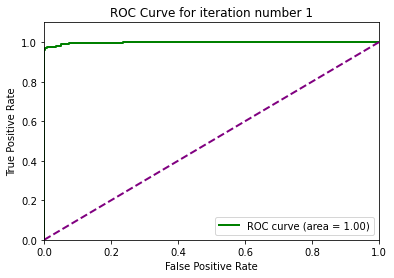

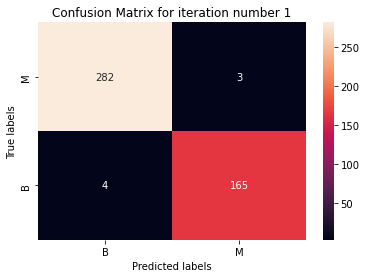

In [366]:
print("---------------------------------------------------------------")
print("For Training Data")
print("---------------------------------------------------------------")
print("Average Accuracy: ",np.mean(train_dict['Accuracy']))
print("Average Precision: ", np.mean(train_dict['Precision']))
print("Average Recall: ",np.mean(train_dict['Recall']))
print("Average F1-Score: ",np.mean(train_dict['F1_Score']))
print("Average AUC: ",np.mean(train_dict['AUC']))
random_datapoint = random.randint(0, 29)
plot_roc(train_dict['ROC'][random_datapoint],random_datapoint)
plot_confusion_matrix(train_dict['CM'][random_datapoint],random_datapoint)

---------------------------------------------------------------
For Testing Data
---------------------------------------------------------------
Average Accuracy:  0.9681159420289853
Average Precision:  0.9662938952317642
Average Recall:  0.9488372093023256
Average F1-Score:  0.9570122895236775
Average AUC:  0.9916020671834626


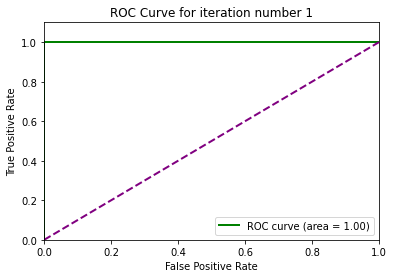

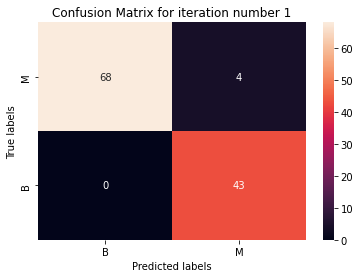

In [367]:
print("---------------------------------------------------------------")
print("For Testing Data")
print("---------------------------------------------------------------")
print("Average Accuracy: ",np.mean(test_dict['Accuracy']))
print("Average Precision: ", np.mean(test_dict['Precision']))
print("Average Recall: ",np.mean(test_dict['Recall']))
print("Average F1-Score: ",np.mean(test_dict['F1_Score']))
print("Average AUC: ",np.mean(test_dict['AUC']))
plot_roc(test_dict['ROC'][random_datapoint],random_datapoint)
plot_confusion_matrix(test_dict['CM'][random_datapoint],random_datapoint)

#### 1 (b) ii.Semi-Supervised Learning/ Self-training:select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. You can select them randomly.

#### A. Train an L1-penalized SVM to classify the labeled data Use normalized data. Choose the penalty parameter using 5 fold cross validation.

#### B. Find the unlabeled data point that is the farthest to the decision boundary of the SVM. Let the SVM label it (ignore its true label), and add it to the labeled data, and retrain the SVM. Continue this process until all unlabeled data are used. Test the final SVM on the test data andthe average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [369]:
train_dict_ssl = defaultdict(list)
test_dict_ssl = defaultdict(list)

for m in range(30):
    X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(X_B, y_B,test_size=0.20, shuffle=True)
    X_train_M, X_test_M, y_train_M, y_test_M = train_test_split(X_M, y_M,test_size=0.20, shuffle=True)

    X_train_ = pd.concat([X_train_M,X_train_B])
    y_train_ = pd.concat([y_train_M,y_train_B])
    X_test_ = pd.concat([X_test_M,X_test_B])
    y_test_ = pd.concat([y_test_M,y_test_B])

    X_label_B, X_unlabel_B, y_label_B, y_unlabel_B = train_test_split(X_train_B,y_train_B, train_size=0.5, shuffle=True)
    X_label_M, X_unlabel_M, y_label_M, y_unlabel_M = train_test_split(X_train_M,y_train_M, train_size=0.5, shuffle=True)

    X_label_train = pd.concat([X_label_B,X_label_M])
    y_label_train = pd.concat([y_label_B,y_label_M])
    X_unlabel_train = pd.concat([X_unlabel_B,X_unlabel_M])
    y_unlabel_train = pd.concat([y_unlabel_B,y_unlabel_M])

    pipeline = imbpipeline(steps = [['minmaxscaler',preprocessing.MinMaxScaler()],['linearsvc', LinearSVC(penalty='l1', dual=False, max_iter=1e+6, tol=0.001)]])
    param_grid = {'linearsvc__C':c_range}
    l1_cv = GridSearchCV(estimator=pipeline,param_grid = param_grid, cv=KFold(5), n_jobs=-1)

    for u in range(len(X_unlabel_train)):
        l1_cv.fit(X_label_train, y_label_train.values.ravel())

        max_id = int(abs(l1_cv.decision_function(X_unlabel_train)).argmax())
        unlabel_data_max_id = pd.DataFrame(X_unlabel_train.iloc[max_id,:]).T

        y_pred_unlabel_data_max_id= pd.DataFrame(l1_cv.predict(unlabel_data_max_id),columns=['diagnosis'])
        y_pred_unlabel_data_max_id.index = unlabel_data_max_id.index

        X_label_train = pd.concat([X_label_train,unlabel_data_max_id])
        yy = pd.concat([y_label_train['diagnosis'],y_pred_unlabel_data_max_id['diagnosis']],axis=0)
        y_label_train = pd.DataFrame(yy)

        X_unlabel_train = X_unlabel_train.drop([X_unlabel_train.index[max_id]])
        X_unlabel_train = X_unlabel_train.reset_index(drop=True)

    y_pred_train_ssl = l1_cv.predict(X_train_)
    y_prob_train_ssl = l1_cv.decision_function(X_train_)
    train_dict_ssl['Accuracy'].append(accuracy_score(y_train['diagnosis'].values.ravel(), y_pred_train_ssl))
    train_dict_ssl['Precision'].append(precision_score(y_train['diagnosis'].values.ravel(), y_pred_train_ssl))
    train_dict_ssl['Recall'].append(recall_score(y_train['diagnosis'].values.ravel(), y_pred_train_ssl))
    train_dict_ssl['F1_Score'].append(f1_score(y_train['diagnosis'].values.ravel(), y_pred_train_ssl))
    train_dict_ssl['AUC'].append(roc_auc_score(y_train['diagnosis'].values.ravel(), y_prob_train_ssl ))
    train_dict_ssl['ROC'].append(roc_curve(y_train['diagnosis'].values.ravel(), y_prob_train_ssl))
    train_dict_ssl['CM'].append(confusion_matrix(y_train['diagnosis'].values.ravel(), y_pred_train_ssl))


    y_pred_test_ssl = l1_cv.predict(X_test_)
    y_prob_test_ssl = l1_cv.decision_function(X_test_)
    test_dict_ssl['Accuracy'].append(accuracy_score(y_test['diagnosis'].values.ravel(), y_pred_test_ssl))
    test_dict_ssl['Precision'].append(precision_score(y_test['diagnosis'].values.ravel(), y_pred_test_ssl))
    test_dict_ssl['Recall'].append(recall_score(y_test['diagnosis'].values.ravel(), y_pred_test_ssl))
    test_dict_ssl['F1_Score'].append(f1_score(y_test['diagnosis'].values.ravel(), y_pred_test_ssl))
    test_dict_ssl['AUC'].append(roc_auc_score(y_test['diagnosis'].values.ravel(), y_prob_test_ssl))
    test_dict_ssl['ROC'].append(roc_curve(y_test['diagnosis'].values.ravel(), y_prob_test_ssl ))
    test_dict_ssl['CM'].append(confusion_matrix(y_test['diagnosis'].values.ravel(), y_pred_test_ssl))



---------------------------------------------------------------
For Training Data
---------------------------------------------------------------
Average Accuracy:  0.9769456681350958
Average Precision:  0.986100814642055
Average Recall:  0.9516765285996056
Average F1-Score:  0.9684307507379236
Average AUC:  0.994325063150974


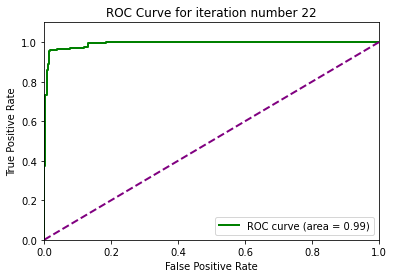

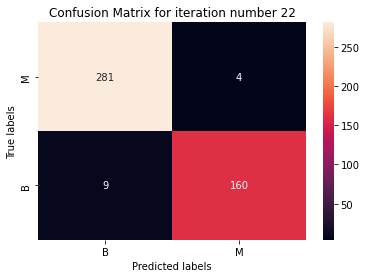

In [370]:
print("---------------------------------------------------------------")
print("For Training Data")
print("---------------------------------------------------------------")
print("Average Accuracy: ",np.mean(train_dict_ssl['Accuracy']))
print("Average Precision: ", np.mean(train_dict_ssl['Precision']))
print("Average Recall: ",np.mean(train_dict_ssl['Recall']))
print("Average F1-Score: ",np.mean(train_dict_ssl['F1_Score']))
print("Average AUC: ",np.mean(train_dict_ssl['AUC']))
random_datapoint = random.randint(0, 29)
plot_roc(train_dict_ssl['ROC'][random_datapoint],random_datapoint)
plot_confusion_matrix(train_dict_ssl['CM'][random_datapoint],random_datapoint)

---------------------------------------------------------------
For Testing Data
---------------------------------------------------------------
Average Accuracy:  0.9591304347826086
Average Precision:  0.9732428632198015
Average Recall:  0.9170542635658915
Average F1-Score:  0.9435259479125189
Average AUC:  0.9902777777777778


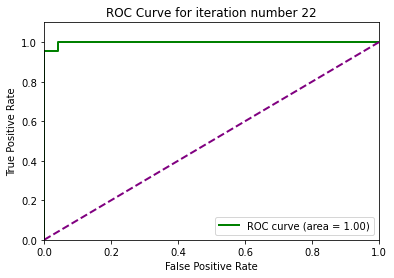

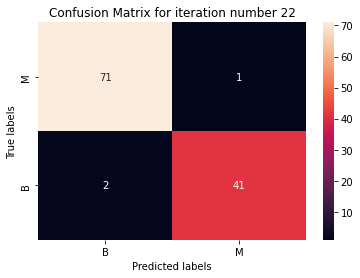

In [371]:
print("---------------------------------------------------------------")
print("For Testing Data")
print("---------------------------------------------------------------")
print("Average Accuracy: ",np.mean(test_dict_ssl['Accuracy']))
print("Average Precision: ", np.mean(test_dict_ssl['Precision']))
print("Average Recall: ",np.mean(test_dict_ssl['Recall']))
print("Average F1-Score: ",np.mean(test_dict_ssl['F1_Score']))
print("Average AUC: ",np.mean(test_dict_ssl['AUC']))
plot_roc(test_dict_ssl['ROC'][random_datapoint],random_datapoint)
plot_confusion_matrix(test_dict_ssl['CM'][random_datapoint],random_datapoint)

#### 1 (b) iii.Unsupervised Learning: Run k-means algorithm on the whole trainingset. Ignore the labels of the data, and assume k= 2.

#### A.Run the k-means algorithm multiple times. Make sure that you initialize the algoritm randomly. How do you make sure that the algorithm was not trapped in a local minimum?

#### In order to make sure the algorithm is not trapped in a local minimum we will have to perform Monte Carlo Simulation and run the algorithm in many iterations with different randome conditions. and calculate the average of the score. However, we cannot avoid local minima completely in case of K_means since clustering techniques are heuristic and explorative.

#### B.Compute the centers of the two clusters and find the closest 30 data points to each center. Read the true labels of those 30 data points and take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the labels provided by k-means with the true labels of the training data and report the average accuracy, precision, recall,F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs.

#### C.Classify test data based on their proximity to the centers of the clusters. Report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs for the test data.

In [372]:
train_dict_kmeans = defaultdict(list)
test_dict_kmeans = defaultdict(list)

for m in range(30):
    X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(X_B, y_B,test_size=0.20, shuffle=True)
    X_train_M, X_test_M, y_train_M, y_test_M = train_test_split(X_M, y_M,test_size=0.20, shuffle=True)

    X_train = pd.concat([X_train_M,X_train_B])
    y_train = pd.concat([y_train_M,y_train_B])
    X_test = pd.concat([X_test_M,X_test_B])
    y_test = pd.concat([y_test_M,y_test_B])

    model_kmeans = KMeans(n_clusters=2,init='random',n_init=5).fit(X_train)

#Using NearestNeigbors() as it is convinient to retrieve the distances along with indices. However an alternative is to use tranform() on X_train.
    n_neigh = NearestNeighbors(n_neighbors=30)
    n_neigh.fit(X_train)
    distances, indices = n_neigh.kneighbors(model_kmeans.cluster_centers_)

    cluster_0 = y_train.iloc[indices[0]]
    poll_0 = cluster_0.value_counts().idxmax()
    cluster_1 = y_train.iloc[indices[1]]
    poll_1 = cluster_1.value_counts().idxmax()

    y_pred_train_km = pd.DataFrame(model_kmeans.labels_)
    y_pred_train_km = y_pred_train_km.replace({0:poll_0,1:poll_1})
    y_prob_train_km = pd.DataFrame(softmax(model_kmeans.transform(X_train),axis=1))

    train_dict_kmeans['Accuracy'].append(accuracy_score(y_train['diagnosis'].values.ravel(), y_pred_train_km))
    train_dict_kmeans['Precision'].append(precision_score(y_train['diagnosis'].values.ravel(), y_pred_train_km))
    train_dict_kmeans['Recall'].append(recall_score(y_train['diagnosis'].values.ravel(), y_pred_train_km))
    train_dict_kmeans['F1_Score'].append(f1_score(y_train['diagnosis'].values.ravel(), y_pred_train_km))
    train_dict_kmeans['AUC'].append(roc_auc_score(y_train['diagnosis'].values.ravel(), y_prob_train_km.iloc[:,1]))
    train_dict_kmeans['ROC'].append(roc_curve(y_train['diagnosis'].values.ravel(), y_prob_train_km.iloc[:,1]))
    train_dict_kmeans['CM'].append(confusion_matrix(y_train['diagnosis'].values.ravel(), y_pred_train_km))

    y_pred_test_km = pd.DataFrame(model_kmeans.predict(X_test))
    y_pred_test_km = y_pred_test_km.replace({0:poll_0,1:poll_1})
    y_prob_test_km = pd.DataFrame(softmax(model_kmeans.transform(X_test),axis=1))

    test_dict_kmeans['Accuracy'].append(accuracy_score(y_test['diagnosis'].values.ravel(), y_pred_test_km))
    test_dict_kmeans['Precision'].append(precision_score(y_test['diagnosis'].values.ravel(), y_pred_test_km))
    test_dict_kmeans['Recall'].append(recall_score(y_test['diagnosis'].values.ravel(), y_pred_test_km))
    test_dict_kmeans['F1_Score'].append(f1_score(y_test['diagnosis'].values.ravel(), y_pred_test_km))
    test_dict_kmeans['AUC'].append(roc_auc_score(y_test['diagnosis'].values.ravel(), y_prob_test_km.iloc[:,1]))
    test_dict_kmeans['ROC'].append(roc_curve(y_test['diagnosis'].values.ravel(), y_prob_test_km.iloc[:,1]))
    test_dict_kmeans['CM'].append(confusion_matrix(y_test['diagnosis'].values.ravel(), y_pred_test_km))

---------------------------------------------------------------
For Training Data
---------------------------------------------------------------
Average Accuracy:  0.8528634361233479
Average Precision:  0.9939009064706392
Average Recall:  0.6084812623274162
Average F1-Score:  0.7547327891890967
Average AUC:  0.6399979238035921


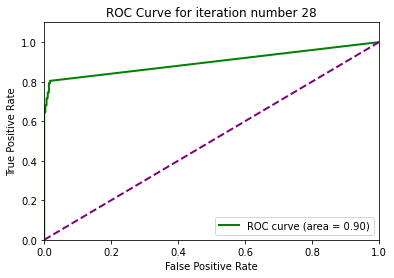

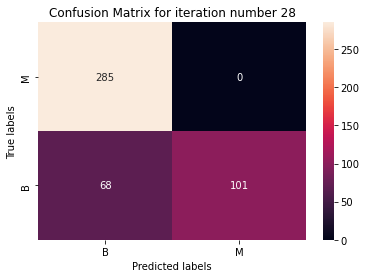

In [375]:
print("---------------------------------------------------------------")
print("For Training Data")
print("---------------------------------------------------------------")
print("Average Accuracy: ",np.mean(train_dict_kmeans['Accuracy']))
print("Average Precision: ", np.mean(train_dict_kmeans['Precision']))
print("Average Recall: ",np.mean(train_dict_kmeans['Recall']))
print("Average F1-Score: ",np.mean(train_dict_kmeans['F1_Score']))
print("Average AUC: ",np.mean(train_dict_kmeans['AUC']))
random_datapoint = random.randint(0,29)
plot_roc(train_dict_kmeans['ROC'][random_datapoint],random_datapoint)
plot_confusion_matrix(train_dict_kmeans['CM'][random_datapoint],random_datapoint)

---------------------------------------------------------------
For Testing Data
---------------------------------------------------------------
Average Accuracy:  0.8553623188405799
Average Precision:  0.9865964884702451
Average Recall:  0.6217054263565892
Average F1-Score:  0.760915714969343
Average AUC:  0.642167312661499


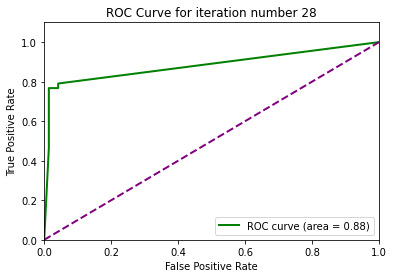

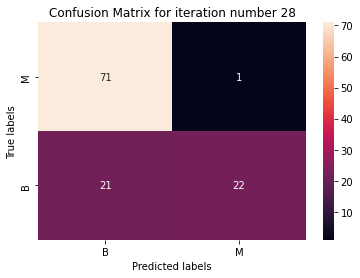

In [376]:
print("---------------------------------------------------------------")
print("For Testing Data")
print("---------------------------------------------------------------")
print("Average Accuracy: ",np.mean(test_dict_kmeans['Accuracy']))
print("Average Precision: ", np.mean(test_dict_kmeans['Precision']))
print("Average Recall: ",np.mean(test_dict_kmeans['Recall']))
print("Average F1-Score: ",np.mean(test_dict_kmeans['F1_Score']))
print("Average AUC: ",np.mean(test_dict_kmeans['AUC']))
plot_roc(test_dict_kmeans['ROC'][random_datapoint],random_datapoint)
plot_confusion_matrix(test_dict_kmeans['CM'][random_datapoint],random_datapoint)

#### 1(b) iv. Spectral Clustering : Repeat 1(b)iii using spectral clustering, which is clustering based on kernels. Research what spectral clustering is. Use RBF kernel with gamma=1 or find a gamma for which the two clutsres have the same balance as the one in original data set (if the positive class has p and the negative class has n samples, the two clusters must have p and n members). Do not label data based on their proximity to cluster center, because spectral clustering may give you non-convex clusters . Instead, use fit−predict method.

#### Extra - Visualizing the difference between normal clusters and data points after spectral clustering.

Text(0.5, 1.0, 'Spectral clustering plot')

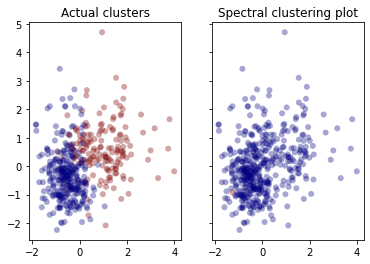

In [172]:
X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(X_B, y_B,test_size=0.20, shuffle=True)
X_train_M, X_test_M, y_train_M, y_test_M = train_test_split(X_M, y_M,test_size=0.20, shuffle=True)

X_train = pd.concat([X_train_M,X_train_B])
y_train = pd.concat([y_train_M,y_train_B])
X_test = pd.concat([X_test_M,X_test_B])
y_test = pd.concat([y_test_M,y_test_B])

X =X_train.values
X = preprocessing.StandardScaler().fit_transform(X_train.values)
sc = SpectralClustering(n_clusters=2)
sc_pred = sc.fit_predict(X)
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(X[:,0], X[:,1], c=y_train["diagnosis"], cmap="jet", edgecolor="None", alpha=0.35)
ax1.set_title("Actual clusters")

ax2.scatter(X[:,0], X[:,1], c=sc_pred, cmap="jet", edgecolor="None", alpha=0.35)
ax2.set_title("Spectral clustering plot")

#### For Spectral clustering, I have used gamma=1 and RBF kernel which are default values to the Spectral clustering API.

In [380]:
train_dict_spec = defaultdict(list)
test_dict_spec = defaultdict(list)

for m in range(30):
    X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(X_B, y_B,test_size=0.20, shuffle=True)
    X_train_M, X_test_M, y_train_M, y_test_M = train_test_split(X_M, y_M,test_size=0.20, shuffle=True)

    X_train = pd.concat([X_train_M,X_train_B])
    y_train = pd.concat([y_train_M,y_train_B])
    X_test = pd.concat([X_test_M,X_test_B])
    y_test = pd.concat([y_test_M,y_test_B])

    sp_clus_labels = SpectralClustering(n_clusters=2).fit_predict(X_train)
    # sp_clus_model = SpectralClustering(n_clusters=2).fit(X_train)
    # sp_clus_labels = sp_clus_model.fit_predict(X_train)

    # y_train['sp_clus_labels']=sp_clus_labels

    # cluster_0 = y_train[y_train['sp_clus_labels']==0]
    # cluster_1 = y_train[y_train['sp_clus_labels']==1]
    # display(cluster_0)
    # l_0 = y_train.iloc[label_0]
    # l_1 = y_train.iloc[label_1]

    # poll_0 = cluster_0['diagnosis'].value_counts().idxmax()
    # poll_1 = cluster_1['diagnosis'].value_counts().idxmax() if cluster_1.size>0 else 1
    # y_train['y_pred'] = sp_clus_labels
    # y_train['y_pred'] = y_train['y_pred'].replace({0:poll_0,1:poll_1})
    # # y_pred_train_spec = y_train['y_pred']
    # display(y_train)

    # label0= sp_clus_labels[sp_clus_labels[0]==0].index 
    # label1= sp_clus_labels[sp_clus_labels[0]==1].index
    # cluster0=X_train.iloc[label0,:]
    # cluster1=X_train.iloc[label1,:]

    # print(cluster0)
    # print(cluster1)


    knn = KNeighborsClassifier(n_neighbors=1)
    # knn.fit(X_train, y_train['y_pred'])
    knn.fit(X_train, sp_clus_labels)

    y_pred_train_clus = knn.predict(X_train)
    y_train['sp_clus_labels'] = y_pred_train_clus

    cluster_0 = y_train[y_train['sp_clus_labels']==0]
    cluster_1 = y_train[y_train['sp_clus_labels']==1]
    poll_0 = cluster_0['diagnosis'].value_counts().idxmax()
    poll_1 = cluster_1['diagnosis'].value_counts().idxmax() if cluster_1.size>0 else 1

    y_pred_train_spec = pd.DataFrame(y_pred_train_clus)
    y_pred_train_spec = y_pred_train_spec.replace({0:poll_0,1:poll_1})


    # y_pred_train_spec = knn.predict(X_train)

    train_dict_spec['Accuracy'].append(accuracy_score(y_train['diagnosis'].values.ravel(), y_pred_train_spec))
    train_dict_spec['Precision'].append(precision_score(y_train['diagnosis'].values.ravel(), y_pred_train_spec))
    train_dict_spec['Recall'].append(recall_score(y_train['diagnosis'].values.ravel(), y_pred_train_spec))
    train_dict_spec['F1_Score'].append(f1_score(y_train['diagnosis'].values.ravel(), y_pred_train_spec))
    train_dict_spec['AUC'].append(roc_auc_score(y_train['diagnosis'].values.ravel(), y_pred_train_spec))
    train_dict_spec['ROC'].append(roc_curve(y_train['diagnosis'].values.ravel(), y_pred_train_spec))
    train_dict_spec['CM'].append(confusion_matrix(y_train['diagnosis'].values.ravel(), y_pred_train_spec))

    y_pred_test_clus = knn.predict(X_test)
    y_pred_test_spec = pd.DataFrame(y_pred_test_clus)
    y_pred_test_spec = y_pred_test_spec.replace({0:poll_0,1:poll_1})

    # y_pred_test_spec = knn.predict(X_test)

    # sp_clus_label_test = SpectralClustering(n_clusters=2).fit_predict(X_test)
    # y_test['y_pred'] = sp_clus_label_test
    # y_test['y_pred'] = y_test['y_pred'].replace({0:poll_0,1:poll_1})
    # y_pred_test_spec = y_test['y_pred']

    test_dict_spec['Accuracy'].append(accuracy_score(y_test['diagnosis'].values.ravel(), y_pred_test_spec))
    test_dict_spec['Precision'].append(precision_score(y_test['diagnosis'].values.ravel(), y_pred_test_spec))
    test_dict_spec['Recall'].append(recall_score(y_test['diagnosis'].values.ravel(), y_pred_test_spec))
    test_dict_spec['F1_Score'].append(f1_score(y_test['diagnosis'].values.ravel(), y_pred_test_spec))
    test_dict_spec['AUC'].append(roc_auc_score(y_test['diagnosis'].values.ravel(), y_pred_test_spec))
    test_dict_spec['ROC'].append(roc_curve(y_test['diagnosis'].values.ravel(), y_pred_test_spec))
    test_dict_spec['CM'].append(confusion_matrix(y_test['diagnosis'].values.ravel(), y_pred_test_spec))

---------------------------------------------------------------
For Training Data
---------------------------------------------------------------
Average Accuracy:  0.6277533039647579
Average Precision:  0.05
Average Recall:  0.000591715976331361
Average F1-Score:  0.0011695906432748538
Average AUC:  0.5001204193916745


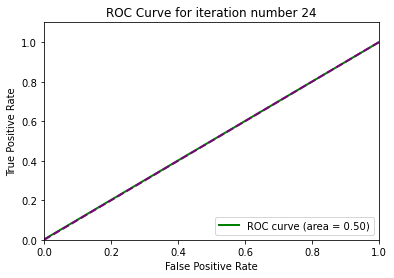

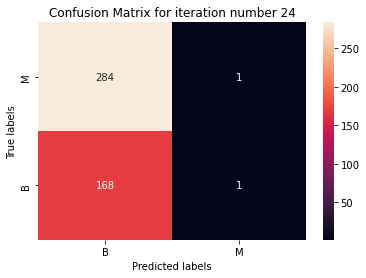

In [416]:
print("---------------------------------------------------------------")
print("For Training Data")
print("---------------------------------------------------------------")
print("Average Accuracy: ",np.mean(train_dict_spec['Accuracy']))
print("Average Precision: ", np.mean(train_dict_spec['Precision']))
print("Average Recall: ",np.mean(train_dict_spec['Recall']))
print("Average F1-Score: ",np.mean(train_dict_spec['F1_Score']))
print("Average AUC: ",np.mean(train_dict_spec['AUC']))
random_datapoint = random.randint(0,29)
plot_roc(train_dict_spec['ROC'][random_datapoint],random_datapoint)
plot_confusion_matrix(train_dict_spec['CM'][random_datapoint],random_datapoint)

---------------------------------------------------------------
For Testing Data
---------------------------------------------------------------
Average Accuracy:  0.6263768115942029
Average Precision:  0.03333333333333333
Average Recall:  0.0007751937984496124
Average F1-Score:  0.001515151515151515
Average AUC:  0.5003875968992249


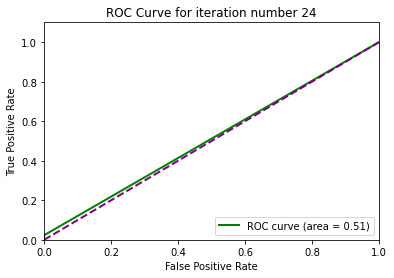

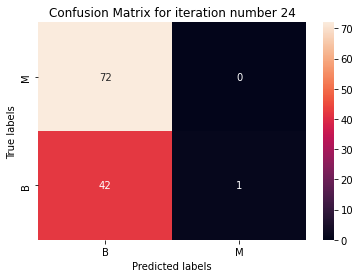

In [417]:
print("---------------------------------------------------------------")
print("For Testing Data")
print("---------------------------------------------------------------")
print("Average Accuracy: ",np.mean(test_dict_spec['Accuracy']))
print("Average Precision: ", np.mean(test_dict_spec['Precision']))
print("Average Recall: ",np.mean(test_dict_spec['Recall']))
print("Average F1-Score: ",np.mean(test_dict_spec['F1_Score']))
print("Average AUC: ",np.mean(test_dict_spec['AUC']))
plot_roc(test_dict_spec['ROC'][random_datapoint],random_datapoint)
plot_confusion_matrix(test_dict_spec['CM'][random_datapoint],random_datapoint)

#### 1(b) v.One can expect that supervised learning on the full data set works better than semi-supervised learning with half of the data set labeled.One can expect that unsupervised learning underperforms in such situations. Compare the results you obtained by those methods.

In [352]:
accuracy = ['Accuracy',np.mean(test_dict['Accuracy']),np.mean(test_dict_ssl['Accuracy']),np.mean(test_dict_kmeans['Accuracy']),np.mean(test_dict_spec['Accuracy'])]
precision = ['Precision',np.mean(test_dict['Precision']),np.mean(test_dict_ssl['Precision']),np.mean(test_dict_kmeans['Precision']),np.mean(test_dict_spec['Precision'])]
recall = ['Recall',np.mean(test_dict['Recall']),np.mean(test_dict_ssl['Recall']),np.mean(test_dict_kmeans['Recall']),np.mean(test_dict_spec['Recall'])]
f1_score = ['F1-Score',np.mean(test_dict['F1_Score']),np.mean(test_dict_ssl['F1_Score']),np.mean(test_dict_kmeans['F1_Score']),np.mean(test_dict_spec['F1_Score'])]
auc =['Area Under Curve',np.mean(test_dict['AUC']),np.mean(test_dict_ssl['AUC']),np.mean(test_dict_kmeans['AUC']),np.mean(test_dict_spec['AUC'])]

display(pd.DataFrame([accuracy,precision,recall,f1_score,auc],columns=['Measuring Parameter','Supervised Learning','Semi-Supervised Learning','Unsupervised K-Means','Unsupervised Spectral']))

,Measuring Parameter,Supervised Learning,Semi-Supervised Learning,Unsupervised K-Means,Unsupervised Spectral
0,Accuracy,0.968116,0.961739,0.852464,0.613623
1,Precision,0.966294,0.974674,0.992553,0.128761
2,Recall,0.948837,0.922481,0.610078,0.036434
3,F1-Score,0.957012,0.946948,0.752180,0.026444
4,Area Under Curve,0.991602,0.987500,0.535223,0.497384


#### Findings:
#### A - From the above accuracy results for this particular dataset, it is very clear that Supervised Learning performs slightly better than Semi-Supervised Learning.
#### B - On comparing Supervised, Semi-Supervised, Unsupervised K-means Clustering and Unsupervised Spectral Clustering, we get the following rankings of the model based on there best to least accuracy.
#### Supervised > Semi-Supervised > Unsupervised K-means Clustering > Unsupervised Spectral Clustering.
#### Thus, it is very clear that Unsupervised learning under performs when compared with the rest.

#### 2.Active Learning Using Support Vector Machines
#### (a) Download the banknote authentication Data Set from: https://archive.ics.uci.edu/ml/datasets/banknote+authentication. Choose 472 data points randomly as the test set, and the remaining 900 points as the training set. This is a binary classification problem.

In [177]:
df_2 = pd.read_csv("../data/data_banknote_authentication.txt", delimiter=",",header=None, names=['variance','skewness','curtosis','entropy','class'])
train, test = train_test_split(df_2, test_size=472)

display(train)
display(test)

,variance,skewness,curtosis,entropy,class
358,2.6917,10.81610,-3.3000,-4.28880,0
1173,-4.7462,3.12050,1.0750,-1.29660,1
652,4.6439,-3.37290,2.5976,0.55257,0
1050,-5.8818,7.65840,0.5558,-2.91550,1
569,1.8238,-6.77480,8.3873,-0.54139,0
...,...,...,...,...,...
815,-3.1128,-6.84100,10.7402,-1.01720,1
1200,-1.8343,-6.59070,5.6429,0.54998,1
876,-3.5916,-6.22850,10.2389,-1.15430,1
417,1.1518,1.38640,5.2727,-0.43536,0


,variance,skewness,curtosis,entropy,class
21,0.32920,-4.45520,4.5718,-0.98880,0
515,5.87820,5.94090,-2.8544,-0.60863,0
783,0.47368,3.36050,-4.5064,-4.04310,1
72,4.71810,10.01530,-3.9486,-3.85820,0
767,-2.28040,-0.30626,1.3347,1.37630,1
...,...,...,...,...,...
1247,-4.47750,-13.03030,17.0834,-3.03450,1
1179,-3.27780,1.80230,0.1805,-2.39310,1
602,2.78310,10.97960,-3.5570,-4.40390,0
389,3.79820,10.42300,-4.1602,-4.97280,0


#### 2(b)Repeat each of the following two procedures 50 times. You will have 50 errors for 90 SVMs per each procedure.

#### i.Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the penalty parameter using 5-fold cross validation.Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. You have implemented passive learning

In [178]:
pipeline = imbpipeline(steps = [['linearsvc', LinearSVC(penalty='l1', dual=False, max_iter=1e+6, tol=0.001)]])
param_grid = {'linearsvc__C':np.logspace(-3,6,20)}
l1_svm_cv = GridSearchCV(estimator=pipeline,param_grid = param_grid, cv=KFold(5), n_jobs=-1)
samples = range(10,901,10)

iter_passive ={}
for m in range(50):
    test_error_passive = []
    train, test = train_test_split(df_2, test_size=472)

    left_to_train = train
    to_train = pd.DataFrame([])

    for i in range(10,901,10):
        sample_10 = left_to_train.sample(10)
        to_train = pd.concat([to_train,sample_10],axis=0)
        left_to_train = left_to_train.drop(sample_10.index)

        passive_model = l1_svm_cv.fit(to_train.iloc[:,:4],to_train['class'])
        y_pred_test_passive = passive_model.predict(test.iloc[:,:4])
        test_error_passive.append(1-(accuracy_score(test['class'], y_pred_test_passive)))
    iter_passive[m] = test_error_passive

In [179]:
#with stratification
pipeline = imbpipeline(steps = [['linearsvc', LinearSVC(penalty='l1', dual=False, max_iter=1e+6, tol=0.001)]])
param_grid = {'linearsvc__C':np.logspace(-3,6,20)}
l1_svm_cv = GridSearchCV(estimator=pipeline,param_grid = param_grid, cv=KFold(5), n_jobs=-1)
samples = range(10,901,10)

iter_passive ={}
iter_passive_train ={}
for m in range(50):
    test_error_passive = []
    train_error_passive = []
    X_train, X_test, y_train, y_test = train_test_split(df_2.iloc[:,:4], df_2['class'],test_size=472,stratify=df_2['class'])

    train = pd.concat([X_train,y_train],axis=1)
    test = pd.concat([X_test,y_test],axis=1)

    left_to_train = train
    to_train = pd.DataFrame([])

    for i in range(10,901,10):
        sample_10 = left_to_train.sample(10)
        to_train = pd.concat([to_train,sample_10],axis=0)
        left_to_train = left_to_train.drop(sample_10.index)

        passive_model = l1_svm_cv.fit(to_train.iloc[:,:4],to_train['class'])
        y_pred_train_passive = passive_model.predict(train.iloc[:,:4])
        y_pred_test_passive = passive_model.predict(test.iloc[:,:4])
        test_error_passive.append(1-(accuracy_score(test['class'], y_pred_test_passive)))
        train_error_passive.append(1-(accuracy_score(train['class'], y_pred_train_passive)))
    iter_passive[m] = test_error_passive
    iter_passive_train[m] = train_error_passive

In [180]:
#train errors
val_passive_train = pd.DataFrame(iter_passive_train.values(), columns = samples)
val_passive_train.loc[len(val_passive_train.index)] = val_passive_train.mean(axis=0)
val_passive_train = val_passive_train.rename(index = {50:"Column Average"})
display(val_passive_train )

,10,20,30,40,50,60,70,80,90,100,...,810,820,830,840,850,860,870,880,890,900
0,0.023333,0.017778,0.021111,0.022222,0.018889,0.017778,0.017778,0.018889,0.018889,0.024444,...,0.007778,0.007778,0.007778,0.007778,0.007778,0.007778,0.011111,0.007778,0.007778,0.008889
1,0.120000,0.024444,0.012222,0.025556,0.020000,0.023333,0.028889,0.033333,0.023333,0.022222,...,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111,0.011111
2,0.146667,0.137778,0.146667,0.021111,0.022222,0.020000,0.018889,0.018889,0.017778,0.016667,...,0.012222,0.012222,0.012222,0.014444,0.013333,0.013333,0.013333,0.013333,0.012222,0.012222
3,0.068889,0.117778,0.094444,0.084444,0.017778,0.008889,0.010000,0.011111,0.007778,0.010000,...,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667
4,0.128889,0.103333,0.032222,0.026667,0.026667,0.097778,0.013333,0.016667,0.026667,0.017778,...,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333,0.013333
5,0.188889,0.128889,0.050000,0.041111,0.015556,0.018889,0.018889,0.020000,0.017778,0.023333,...,0.014444,0.014444,0.013333,0.012222,0.013333,0.013333,0.013333,0.014444,0.016667,0.016667
6,0.444444,0.142222,0.142222,0.142222,0.011111,0.041111,0.005556,0.008889,0.010000,0.005556,...,0.007778,0.007778,0.007778,0.007778,0.007778,0.007778,0.007778,0.007778,0.007778,0.007778
7,0.087778,0.018889,0.022222,0.018889,0.016667,0.020000,0.022222,0.016667,0.016667,0.010000,...,0.007778,0.008889,0.008889,0.007778,0.007778,0.008889,0.008889,0.008889,0.008889,0.008889
8,0.016667,0.023333,0.020000,0.018889,0.014444,0.013333,0.012222,0.011111,0.013333,0.013333,...,0.010000,0.010000,0.011111,0.011111,0.010000,0.010000,0.011111,0.011111,0.010000,0.010000
9,0.101111,0.140000,0.050000,0.037778,0.027778,0.064444,0.050000,0.047778,0.032222,0.031111,...,0.008889,0.008889,0.008889,0.008889,0.008889,0.008889,0.008889,0.008889,0.008889,0.008889


In [181]:
#test errors
val_passive = pd.DataFrame(iter_passive.values(), columns = samples)
val_passive.loc[len(val_passive.index)] = val_passive.mean(axis=0)
val_passive = val_passive.rename(index = {50:"Column Average"})
display(val_passive )
passive_df = val_passive.iloc[50:,:].values

,10,20,30,40,50,60,70,80,90,100,...,810,820,830,840,850,860,870,880,890,900
0,0.031780,0.021186,0.029661,0.029661,0.029661,0.029661,0.029661,0.029661,0.027542,0.029661,...,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712
1,0.088983,0.023305,0.006356,0.008475,0.012712,0.012712,0.010593,0.016949,0.010593,0.012712,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.006356,0.006356,0.006356,0.004237,0.006356
2,0.108051,0.101695,0.103814,0.006356,0.010593,0.010593,0.010593,0.008475,0.004237,0.006356,...,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237,0.004237
3,0.065678,0.131356,0.122881,0.110169,0.014831,0.016949,0.019068,0.023305,0.014831,0.016949,...,0.012712,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831
4,0.122881,0.072034,0.014831,0.008475,0.008475,0.082627,0.004237,0.004237,0.010593,0.008475,...,0.002119,0.002119,0.002119,0.002119,0.002119,0.002119,0.002119,0.002119,0.002119,0.002119
5,0.197034,0.137712,0.052966,0.044492,0.006356,0.006356,0.008475,0.023305,0.019068,0.025424,...,0.002119,0.002119,0.000000,0.000000,0.002119,0.002119,0.002119,0.002119,0.002119,0.002119
6,0.444915,0.182203,0.182203,0.182203,0.016949,0.057203,0.014831,0.014831,0.016949,0.012712,...,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712
7,0.076271,0.014831,0.014831,0.014831,0.014831,0.012712,0.012712,0.014831,0.014831,0.008475,...,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593
8,0.008475,0.019068,0.016949,0.008475,0.014831,0.008475,0.006356,0.006356,0.008475,0.008475,...,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356
9,0.093220,0.144068,0.055085,0.031780,0.023305,0.082627,0.061441,0.061441,0.021186,0.019068,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475


#### ii. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the parameters of the SVMwith 5-fold cross validation. Choose the 10 closest data points in the training set to the hyperplane of the SVM 6 and add them to the pool. Do not replace the samples back into the training set. Train a new SVM using the pool. Repeat this process until all training data is used. You will have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors. You have implemented active learning


In [182]:
iter_active ={}
iter_active_train ={}
for m in range(50):
    test_error = []
    train_error = []
    train, test = train_test_split(df_2, test_size=472)

    data_left_to_train = train
    data_to_train = train.sample(10)
    data_left_to_train = data_left_to_train.drop(data_to_train.index)

    active_model = l1_svm_cv.fit(data_to_train.iloc[:,:4],data_to_train['class'])
    y_pred_train_active = active_model.predict(train.iloc[:,:4])
    y_pred_test_active = active_model.predict(test.iloc[:,:4])
    test_error.append(1-(accuracy_score(test['class'], y_pred_test_active)))
    train_error.append(1-(accuracy_score(train['class'], y_pred_train_active)))
    
    for i in range(20,901,10):             
        active_model = l1_svm_cv.fit(data_to_train.iloc[:,:4],data_to_train['class'])
        dist = active_model.decision_function(data_left_to_train.iloc[:,:4])
        data_left_to_train['dist'] = dist
        data_left_to_train['absdist'] = abs(dist)
        top_10 = data_left_to_train.sort_values(by=['absdist']).iloc[:10,:]

        data_to_train = pd.concat([data_to_train,top_10],axis=0)
        data_left_to_train = data_left_to_train.drop(top_10.index)

        y_pred_train_active = active_model.predict(train.iloc[:,:4])
        y_pred_test_active = active_model.predict(test.iloc[:,:4])
        test_error.append(1-(accuracy_score(test['class'], y_pred_test_active)))
        train_error.append(1-(accuracy_score(train['class'], y_pred_train_active)))
    iter_active[m] = test_error
    iter_active_train[m] = train_error

In [183]:
#train errors
val_active_train = pd.DataFrame(iter_active_train.values(), columns = samples)
val_active_train.loc[len(val_active_train.index)] = val_active_train.mean(axis=0)
val_active_train = val_active_train.rename(index = {50:"Column Average"})
display(val_active_train )

,10,20,30,40,50,60,70,80,90,100,...,810,820,830,840,850,860,870,880,890,900
0,0.013333,0.020000,0.177778,0.064444,0.008889,0.007778,0.007778,0.008889,0.011111,0.008889,...,0.008889,0.008889,0.008889,0.008889,0.008889,0.008889,0.008889,0.008889,0.008889,0.008889
1,0.056667,0.066667,0.027778,0.067778,0.028889,0.018889,0.010000,0.008889,0.006667,0.010000,...,0.011111,0.011111,0.008889,0.008889,0.008889,0.008889,0.008889,0.008889,0.008889,0.008889
2,0.144444,0.141111,0.020000,0.026667,0.014444,0.010000,0.015556,0.011111,0.014444,0.014444,...,0.014444,0.012222,0.012222,0.014444,0.012222,0.014444,0.011111,0.011111,0.014444,0.014444
3,0.150000,0.196667,0.088889,0.021111,0.016667,0.068889,0.016667,0.008889,0.006667,0.006667,...,0.012222,0.012222,0.011111,0.011111,0.011111,0.012222,0.011111,0.012222,0.011111,0.011111
4,0.053333,0.053333,0.016667,0.064444,0.012222,0.011111,0.006667,0.012222,0.012222,0.011111,...,0.012222,0.012222,0.012222,0.012222,0.011111,0.012222,0.012222,0.012222,0.012222,0.012222
5,0.107778,0.107778,0.027778,0.096667,0.033333,0.022222,0.010000,0.005556,0.007778,0.010000,...,0.008889,0.008889,0.008889,0.008889,0.008889,0.008889,0.008889,0.008889,0.008889,0.010000
6,0.144444,0.144444,0.068889,0.033333,0.021111,0.012222,0.013333,0.013333,0.013333,0.012222,...,0.013333,0.012222,0.013333,0.012222,0.012222,0.013333,0.011111,0.012222,0.013333,0.012222
7,0.191111,0.191111,0.028889,0.034444,0.027778,0.026667,0.021111,0.014444,0.015556,0.012222,...,0.012222,0.012222,0.012222,0.012222,0.010000,0.013333,0.012222,0.013333,0.013333,0.012222
8,0.103333,0.111111,0.015556,0.077778,0.024444,0.010000,0.011111,0.008889,0.007778,0.007778,...,0.007778,0.007778,0.007778,0.007778,0.007778,0.007778,0.007778,0.007778,0.007778,0.007778
9,0.105556,0.086667,0.036667,0.014444,0.012222,0.005556,0.004444,0.004444,0.004444,0.006667,...,0.010000,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667,0.006667


In [184]:
#test errors
val_active = pd.DataFrame(iter_active.values(), columns=samples)
val_active.loc[len(val_active.index)] = val_active.mean(axis=0)
val_active = val_active.rename(index = {50:"Column Average"})
display(val_active )

active_df = val_active.iloc[50:,:].values


,10,20,30,40,50,60,70,80,90,100,...,810,820,830,840,850,860,870,880,890,900
0,0.012712,0.012712,0.169492,0.050847,0.008475,0.006356,0.006356,0.006356,0.012712,0.010593,...,0.010593,0.010593,0.010593,0.010593,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475
1,0.052966,0.055085,0.027542,0.082627,0.048729,0.016949,0.014831,0.008475,0.008475,0.010593,...,0.012712,0.012712,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593
2,0.112288,0.101695,0.008475,0.016949,0.006356,0.006356,0.006356,0.004237,0.006356,0.006356,...,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356
3,0.120763,0.199153,0.074153,0.029661,0.016949,0.074153,0.016949,0.004237,0.010593,0.010593,...,0.010593,0.010593,0.006356,0.006356,0.006356,0.010593,0.006356,0.010593,0.006356,0.006356
4,0.046610,0.046610,0.010593,0.067797,0.010593,0.023305,0.012712,0.010593,0.012712,0.008475,...,0.010593,0.010593,0.008475,0.010593,0.008475,0.008475,0.008475,0.008475,0.010593,0.010593
5,0.118644,0.118644,0.036017,0.095339,0.042373,0.029661,0.014831,0.014831,0.010593,0.014831,...,0.010593,0.010593,0.014831,0.014831,0.014831,0.014831,0.014831,0.010593,0.014831,0.014831
6,0.177966,0.177966,0.067797,0.025424,0.025424,0.004237,0.006356,0.008475,0.008475,0.008475,...,0.014831,0.008475,0.008475,0.008475,0.008475,0.008475,0.006356,0.008475,0.008475,0.008475
7,0.167373,0.167373,0.021186,0.025424,0.025424,0.021186,0.016949,0.008475,0.008475,0.008475,...,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475,0.008475
8,0.131356,0.105932,0.021186,0.088983,0.025424,0.008475,0.012712,0.012712,0.012712,0.012712,...,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.010593,0.010593
9,0.112288,0.118644,0.055085,0.027542,0.016949,0.014831,0.012712,0.012712,0.012712,0.014831,...,0.016949,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712


#### 2 (c) Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i and 2(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot average test error versus number of training instances for both active and passive learners on the same figure and report your conclusions. Here, you are actually obtaining a learning curve by Monte-Carlo simulation

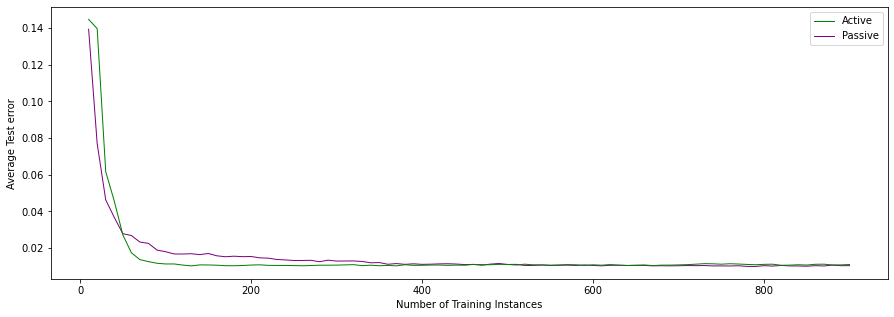

In [185]:
plt.figure(figsize=(15, 5))
passive,=plt.plot(samples, passive_df.T,label='Passive',linewidth=1.0, c='purple')
active,=plt.plot(samples, active_df.T,label='Active',linewidth=1.0, c='green')
plt.legend(handles=[active,passive])
plt.ylabel('Average Test error')
plt.xlabel('Number of Training Instances')
plt.show()

# REFERENCES

[1] - https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/

[2] - https://scikit-learn-general.narkive.com/2113zSYN/interpreting-the-cluster-centers-in-sklearn-kmeans

[3] - https://datascience.stackexchange.com/questions/87792/how-do-i-calculate-distance-of-test-data-point-from-centroids-in-kmeans-scikit-l

[4] - https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

[5] - https://stackoverflow.com/questions/36195457/how-to-get-the-samples-in-each-cluster

[6] - https://datascience.stackexchange.com/questions/75959/how-to-get-the-probability-closeness-of-a-sample-belonging-to-a-specific-cluster

[7] - https://juanitorduz.github.io/spectral_clustering/

[8] - https://stackoverflow.com/questions/53790832/how-to-get-n-numbers-of-data-points-which-are-nearest-from-a-clusters-center

[9] - https://towardsdatascience.com/spectral-clustering-82d3cff3d3b7

[10] - https://carpentries-incubator.github.io/machine-learning-novice-sklearn/04-clustering/index.html

[11] - https://www.kaggle.com/code/raphaelekete/cluster-analysis-of-breast-cancer-data-set
